# Examen Parcial 1

## Nombre: Francisco Javier Peralta Ramírez

### 16 octubre 2018

# 3 de 4 Problemas de Programación

**1**. Escriba una fucnión que regrese una lista con los primeros n números de la secuancia de Fibonacci: $[F(0), F(1)], F[2], \ldots F(n-1)]$. Donde 
$$
F(1)=0, \;\; F(1) = 1 
$$
y 
$$
F(n) = F(n-1)+F(n-2)
$$

In [12]:
def fib(n):
    if(n == 0): return []
    if(n == 1): return [0]
    if(n == 2): return [0, 1]
    f = [0, 1]
    def _next_fib():
        return f[-1] + f[-2] 
    while(n-2):
        f.append(_next_fib())
        n -= 1
    return f
fib(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

**2.** Implemente (sin usar las funciones `pop`, `push` y `append`) las funciones `mypop`, `mypush` para majenar una lista de python como una pila. La funcionalidad que se espera es la siguiente

In [32]:
pila = [1,2,3,4]

`mypush(pila)` se comporte como

In [211]:
pila.append(5)
pila

[1, 2, 3, 4, 5]

In [33]:
def mypush(p, v):  
    p[:] = p+[v] #asigna los valores nuevos, de esta forma si modifica la lista
mypush(pila, 5)
pila

[1, 2, 3, 4, 5]

`mypop(pila)` tenga el comportamiento como

In [212]:
pila.pop()

5

In [34]:
def mypop(p):  
    poped = p[-1]
    p[:] = p[:-1]
    return poped
mypop(pila)

5

y un `mypop([])` sobre una lista vacia genere una execpción

In [213]:
pila=[]
pila.pop()

IndexError: pop from empty list

La implementación ya devuelve una excepción, no fue necesario agregar una

In [38]:
mypop([])

IndexError: list index out of range

**3.** Usando sympy, escriba el código que calcule el Hessiano simbólico de
$$
 f(x) = (x + y - z)^2 + y\, \cos(x^2)
$$


In [162]:
import sympy as sp
sp.init_printing()
def mf(x, y, z, lib=sp):
    return (x + y -z)**2 + y * lib.cos(x**2)

In [213]:
p = sp.symbols("x, y, z")
mfs = mf(p[0], p[1], p[2])
H = []
g = []
for i in range(len(p)):
    d = mfs.diff(p[i])
    g.append(d)
    hi = []
    for j in range(len(p)):
        hi.append(mfs.diff(p[i]).diff(p[j]))
    H.append(hi)
# sp.print(g)
g

**4** (OBLIGATORIO) Escriba la función `myroll` que hace un shift circular de uma matriz 2-dimensional de tamaño mxn. Por ejemplo

In [214]:
H

In [83]:
import numpy as np
A = [[ 1, 2 , 3, 4],[ 5, 6 , 7, 8], [ 9, 10 , 11, 12], [ 13, 14 , 15, 16]] 
print(np.asarray(A))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


Al hacer myroll(A,2,1), resulta en


In [8]:
print(np.asarray([[ 10, 11 , 12, 9],[ 14, 15 , 16, 13], [ 2, 3, 4, 1], [ 6, 7, 8, 5]]))

[[10 11 12  9]
 [14 15 16 13]
 [ 2  3  4  1]
 [ 6  7  8  5]]


In [91]:
A = [[ 1, 2 , 3, 4],[ 5, 6 , 7, 8], [ 9, 10 , 11, 12], [ 13, 14 , 15, 16]] 
def myrol(A, rs, cs):
    for i in range(len(A[0])):
        A[i] = A[i][cs:] + A[i][:cs]
    A[:] = A[rs:] + A[:rs]
    return A
myrol(A, 2, 1)
print(np.asarray(A))

[[10 11 12  9]
 [14 15 16 13]
 [ 2  3  4  1]
 [ 6  7  8  5]]


# 1 Problema de Optimización

In [92]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(100))

Dada la función suave

$$
 y_i = \sin\left(\frac{x_i}{7}\right) + 2\, \cos \left(\frac{x_i-70}{20}\right) + K
$$
donde K es una constante que hace que $y \succeq 0$ y $x_i = i$ para $i = 0,1,2 \ldots, n$; con $n=100$

-------------

Resolver
$$
\underset{\theta}{\arg \min } \; \| \Phi \theta - y  \|^2 \\
\;\;\;\;\;\;\; s.a. \;\; \theta \ge 0 
$$

Usando los algoritmos NAG proyectado

-------------


Donde 

$$\Phi = [\phi_0, \phi_2, \ldots, \phi_m]$$ 

es un diccionario de funciones base
y $\phi_j$ es el $j$-ésimo átomo (función base), que es un vector columna y se define como

$$
\phi_i = \exp\left(-\frac{x-m_i}{2\sigma^2} \right)
$$

La estrategia de gradiente proyectado de define como sigue:

Sea $m =\mathbf{1}$ un vector con unos en todas sus entradas y de las mismas dimensiones que $\theta$, luego

Iterar los siguientes pasos hasta convergencias

1. Calcular el Gradiente de la función objetivo

2. Calcular la dirección de descenso: $p=-g$

3. Actualizar los parámetros 
$$
\theta^{t+1} = \theta^t  \alpha * m \odot p
$$ 
donde $\odot$ es el producto elemento a elemento (producto de Hadamard: $x \odot y = [x_1 y_1, x_2 y_2, \ldots]^\top$).

4. Detectar los índices de las entradas que violan la restricción: 
$$ \Omega = \{ i : \theta_i <0\}$$

5. Recortar (Clipping) las variables que se salen de la región factible: $\forall i \in \Omega$ hacer $\theta_i=0$

6. Recortar $m$: $\forall i \in \Omega$ hacer $m_i=0$



In [93]:
def f(x):
    y=np.sin(x/7)+2.*np.cos((x-70)/20)
    return y-np.min(y)

def gss(x, media, s):
    return np.exp(-(x-media)**2/(2.*s**2))

def calculaPhi(x, paso=10, sigma=5):
    medias=np.mgrid[0:len(x):paso]
    Phi=[]
    for media in medias:
        phi= gss(x,media,sigma)
        Phi.append(phi)
    return np.array(Phi).T

def calculaGradf(y, Phi, theta):
    grad = Phi.T@(Phi@theta-y)
    return grad

# señal
y=f(x)
# Diccionario
Phi=calculaPhi(x=x,paso=11,sigma=8)

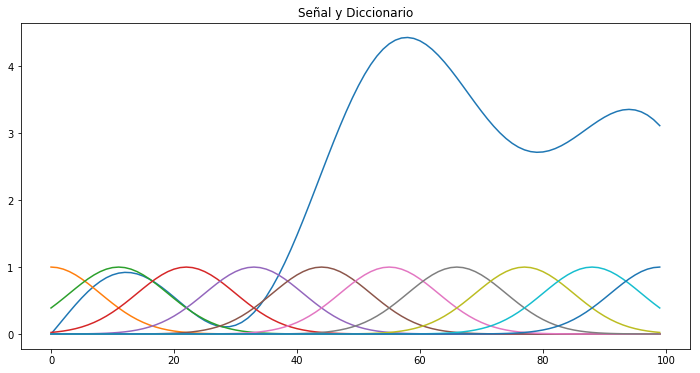

In [94]:
plt.figure(figsize=(12,6))
plt.plot(y)

n,m= Phi.shape
for i in range(m):
    plt.plot(Phi[:,i])

plt.title('Señal y Diccionario')
plt.show()

Modificamos el desenso de gradiente simple SIN RESTRICCION, para contemplar las resticciones como se describe en los pasos 4-6 del algoritmo

In [142]:
N=100
theta  = np.ones(m)
proy_m = np.ones(m)

alpha=0.01
for i in range(N):
    grad  = calculaGradf(y, Phi, theta)
    theta = theta-alpha*proy_m * grad
    omega = theta < 0
    theta[omega] = 0
    proy_m[omega] = 0

print('grad=\n', grad@grad)
print('theta=\n', theta)

grad=
 3.3620074265091775
theta=
 [0.         0.85256397 0.         0.         1.06869266 3.09777065
 2.14328549 1.08092326 1.77909886 2.31648113]


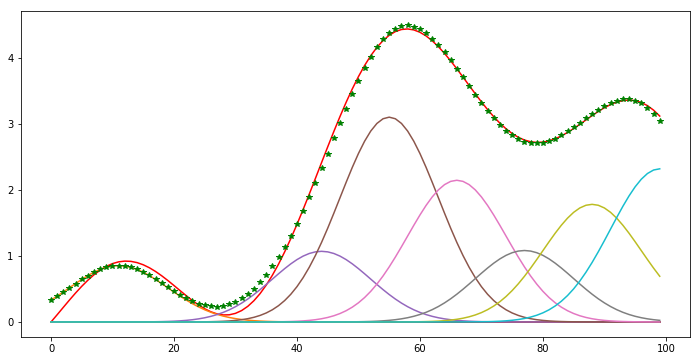

In [107]:
plt.figure(figsize=(12,6))
plt.plot(y, 'r')
for i in range(m):
    plt.plot(theta[i]*Phi[:,i])

haty= Phi@theta
plt.plot(haty, 'g*')
plt.title('')
plt.show()

Implementamos el algoritmo NAG con las resticciones y la proyección

In [172]:
def nag(f, gradf, params_grad, x0, nIter, alpha, eta=0.5):
    assert alpha > 0 and eta > 0#positive step size
    proy_m = np.ones(m)
    a, e, x = alpha, eta, x0
    p = gradf(**params_grad, theta=x)
    x = x - a * p
    for i in range(nIter - 1): #ya hicimos la primera iteracion...
        if(i % 5): proy_m = np.ones(m)
        xn = x - a * proy_m * p #tomamos el paso anterior
        omega = xn < 0
        xn[omega] = 0
        proy_m[omega] = 0
        gt = gradf(**params_grad, theta=x)
        p = e * p + gt #nueva dir
        x = xn -  a * proy_m * p
        omega = xn < 0
        xn[omega] = 0
        proy_m[omega] = 0
        proy_m[omega] = 0
    grad = gradf(**params_grad, theta=x)
    print(grad @ grad)
    return  x

In [173]:
%%time
theta = nag(None, calculaGradf, {'y':y, 'Phi':Phi}, np.ones(m), 10000, 0.001)
print(theta)

2.796859417810218
[0.         0.85333949 0.         0.         1.02802892 3.18525556
 2.02087048 1.22120025 1.63912693 2.43032538]
CPU times: user 196 ms, sys: 4.35 ms, total: 201 ms
Wall time: 198 ms


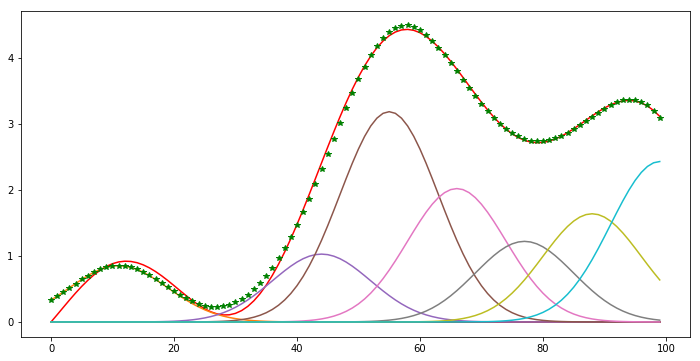

In [169]:
plt.figure(figsize=(12,6))
plt.plot(y, 'r')
for i in range(m):
    plt.plot(theta[i]*Phi[:,i])

haty= Phi@theta
plt.plot(haty, 'g*')
plt.title('')
plt.show()